In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn._config import  set_config
set_config(print_changed_only=False)

In [2]:
# Read File
df= pd.read_csv('../input/mushroom/mushrooms.csv')

# View all columns
pd.set_option("display.max_columns", None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## EDA and Data_Pepration

In [3]:
X= df.drop('class', axis= 1)
y= df['class']

In [4]:
X.shape

(8124, 22)

In [5]:
X.describe().T

,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

- No 'NaN' value in the dataset
- Total 8124 observations and 22 features are present
- All features are categorical in Nature

In [7]:
# target classes and their distribution

class_dist=  y.value_counts()
class_dist

e    4208
p    3916
Name: class, dtype: int64

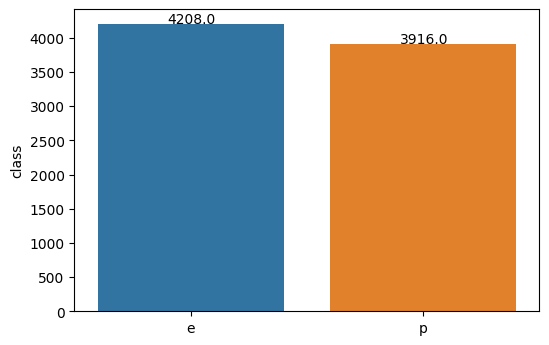

In [8]:
plt.figure(dpi= 100)
ax= sns.barplot(x= class_dist.index, y= class_dist)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+4))

- Observation: 
  ##### Class Count is not much Imbalanced


### Distribution of Features

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 
_________

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 
_________

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 
_________

f    4748
t    3376
Name: bruises, dtype: int64 
_________

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 
_________

f    7914
a     210
Name: gill-attachment, dtype: int64 
_________

c    6812
w    1312
Name: gill-spacing, dtype: int64 
_________

b    5612
n    2512
Name: gill-size, dtype: int64 
_________

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 
_________

t    4608
e    3516
Name: stalk-shape, dtype: int64 
_________

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-r

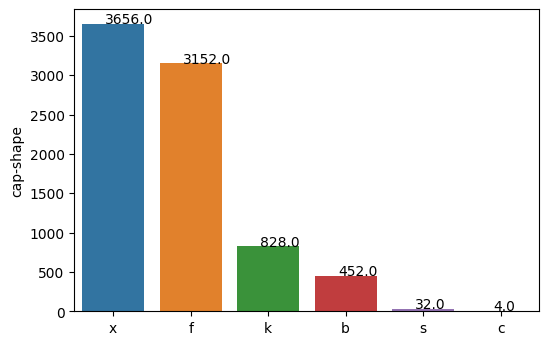

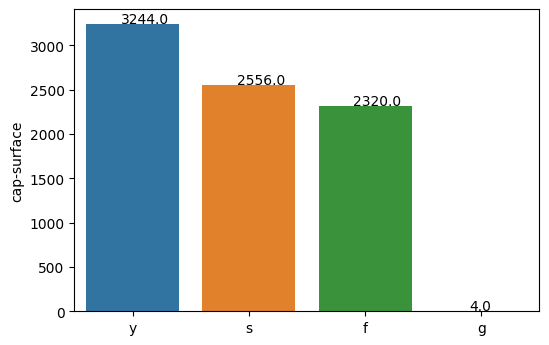

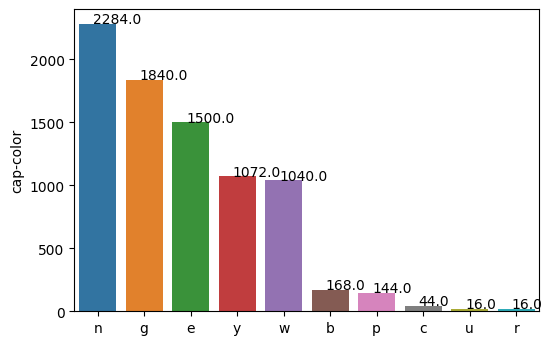

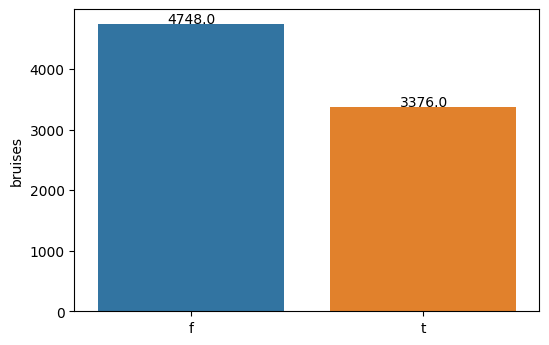

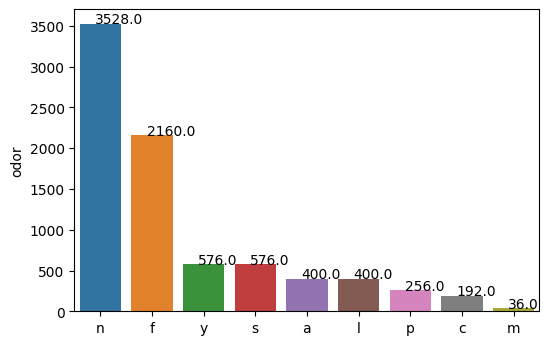

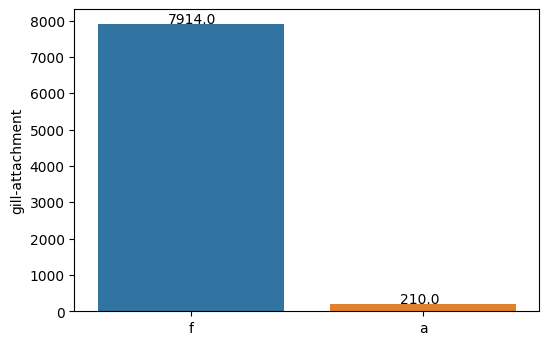

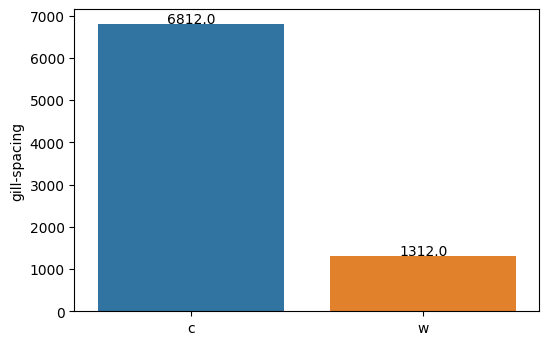

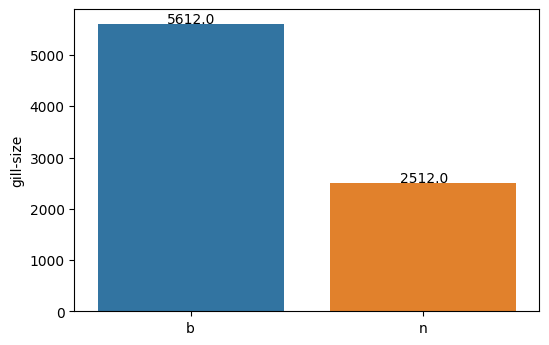

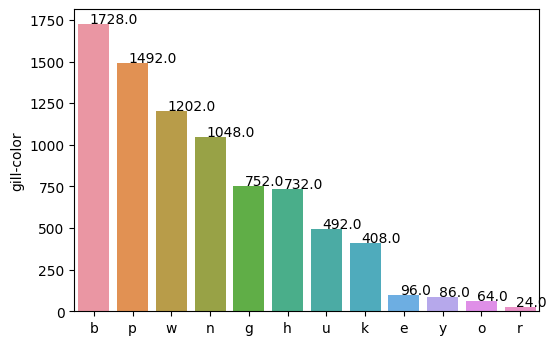

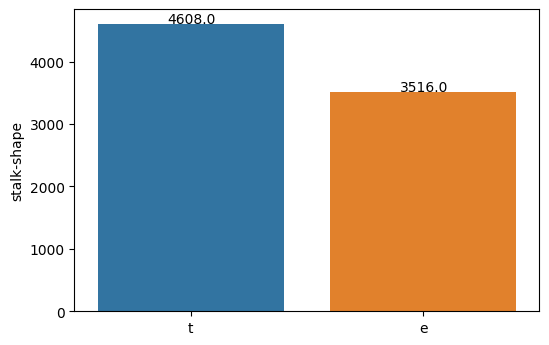

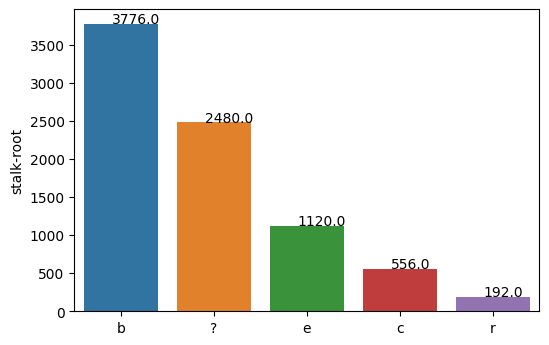

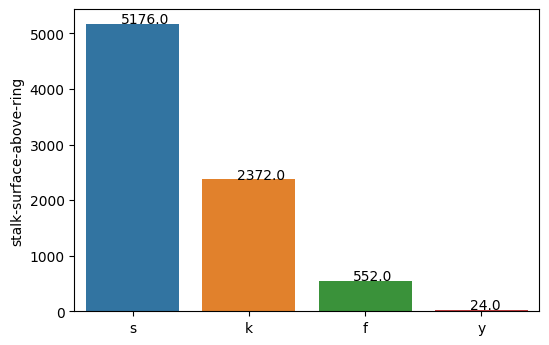

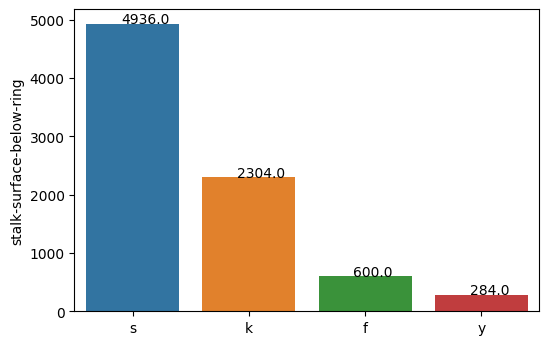

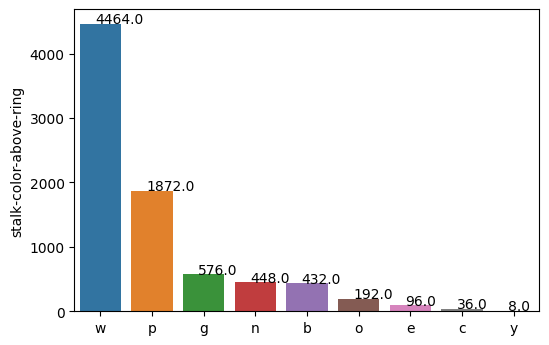

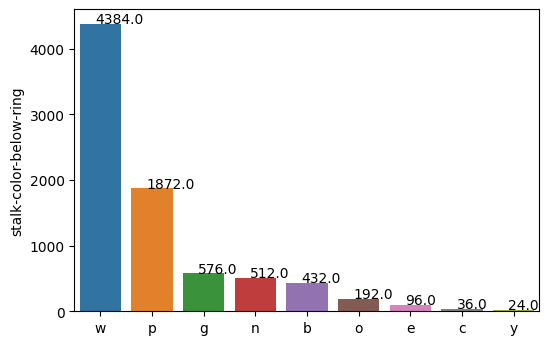

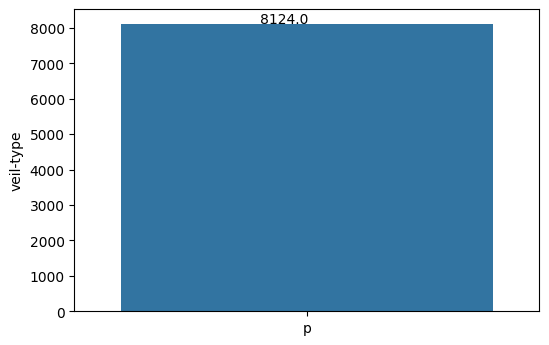

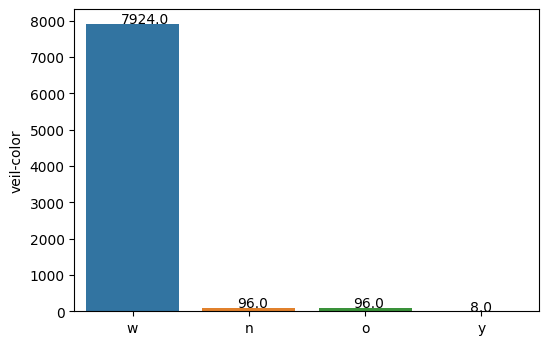

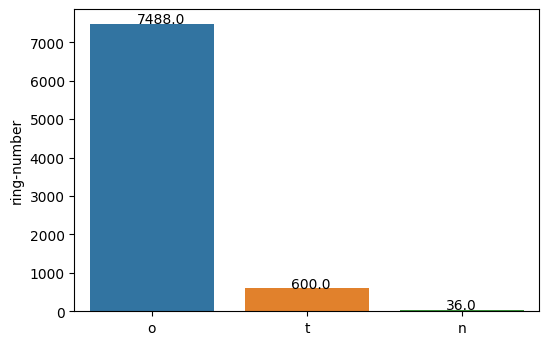

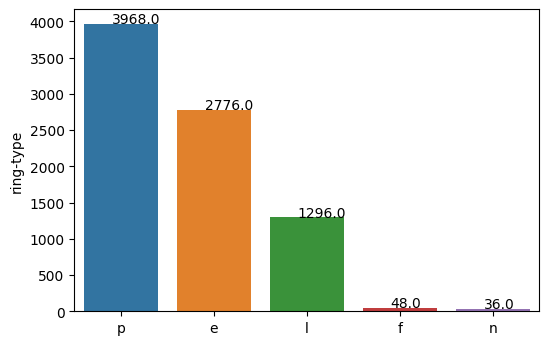

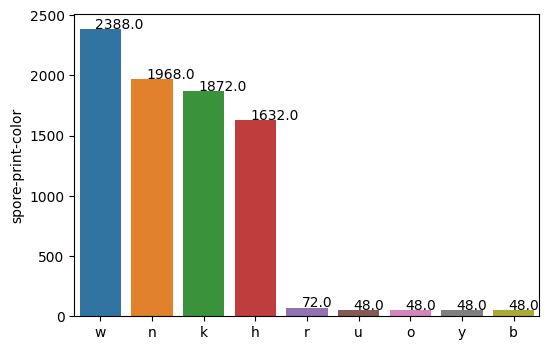

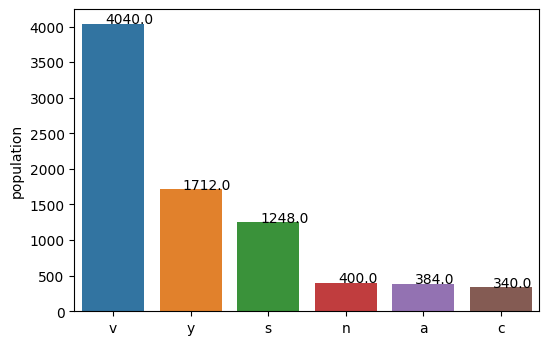

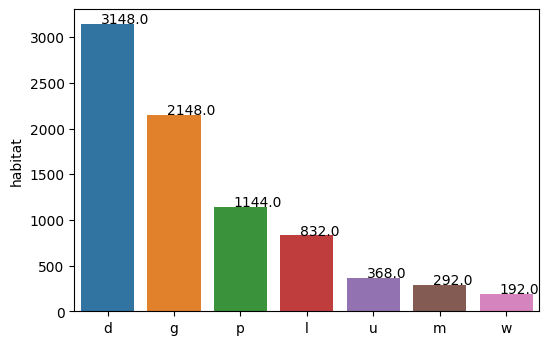

In [9]:
for i, col in enumerate(X):
    feature_vc= X[col].value_counts()
    print(feature_vc, "\n_________\n")
    
    plt.figure(i, dpi= 100)
    ax= sns.barplot(x= feature_vc.index, y= feature_vc)
    for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+4))

## Feature Distribution Against Traget Class

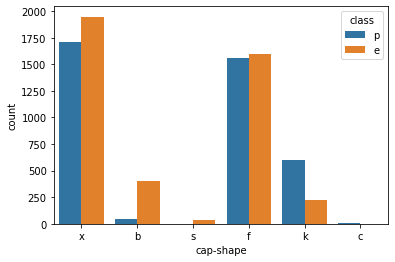

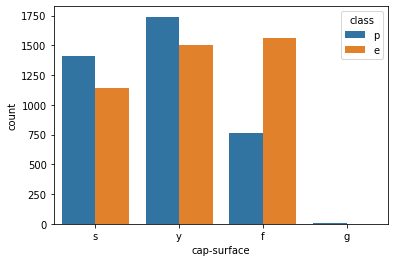

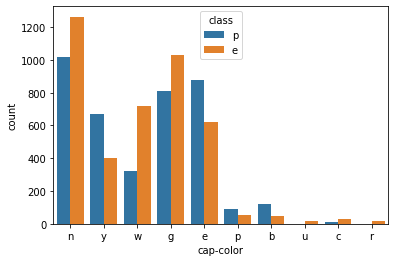

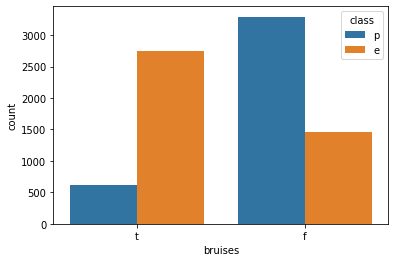

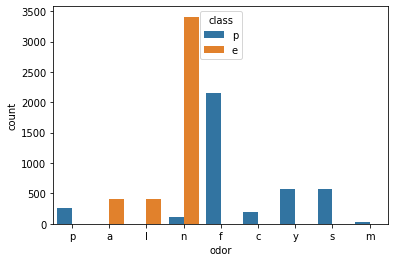

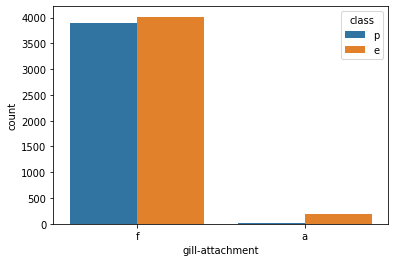

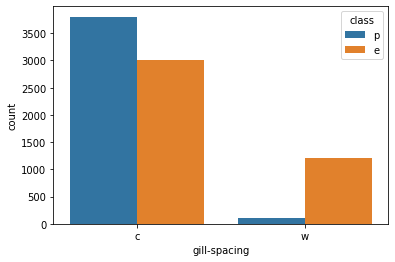

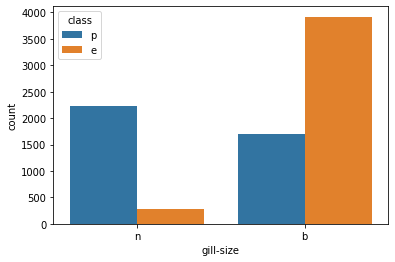

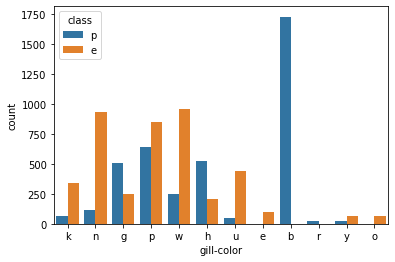

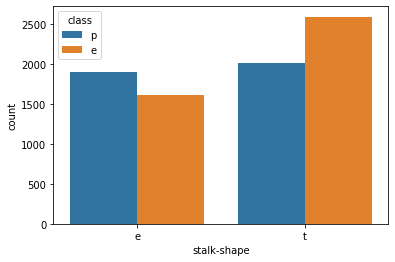

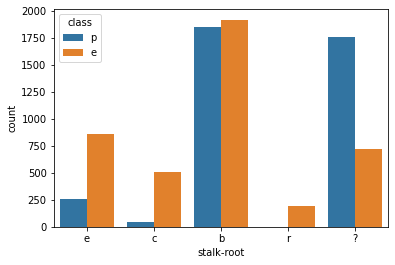

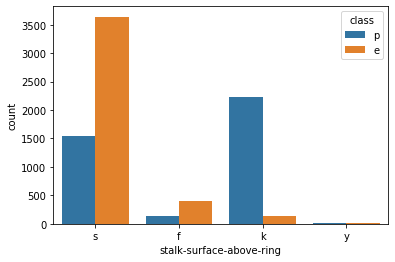

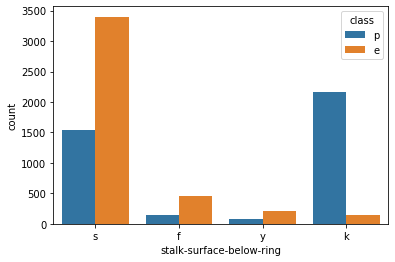

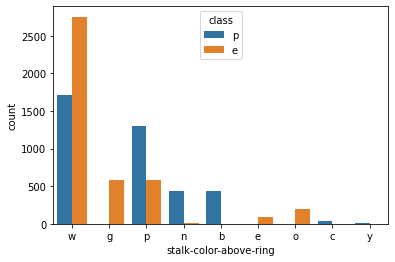

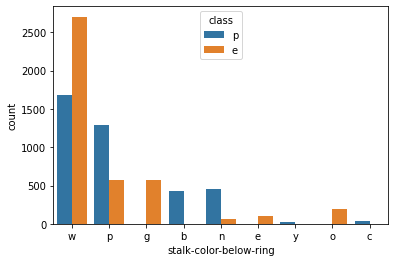

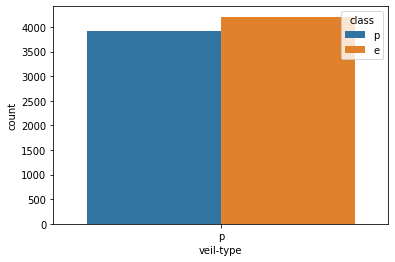

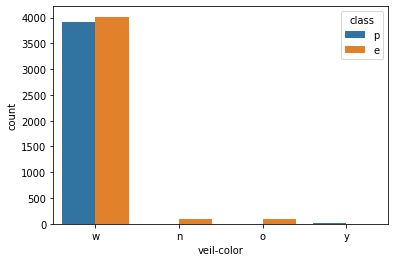

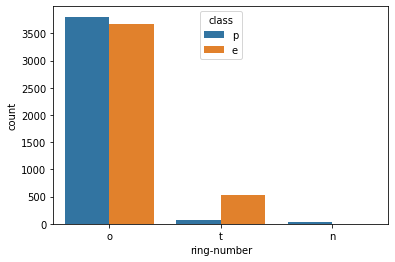

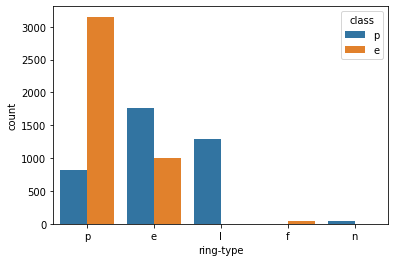

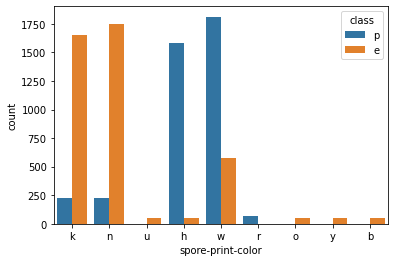

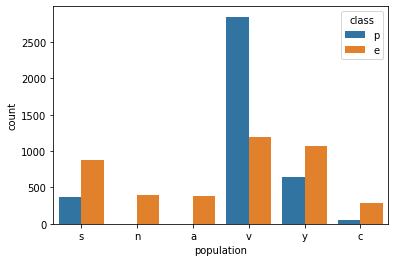

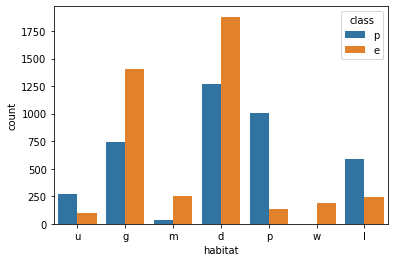

In [10]:
for i, col in enumerate(X):
    plt.figure(i)
    sns.countplot(x= col, hue= y, data=X)

## Data-Pepration

In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()
df_oe= oe.fit_transform(df)


In [12]:
df= pd.DataFrame(df_oe, columns= df.columns)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


In [13]:
X= df.drop('class', axis= 1)
y= df['class']

## Prediction

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.10, random_state= 2020)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [17]:
dt= DecisionTreeClassifier()

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [19]:
y_pred= dt.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
accuracy_score(y_test, y_pred)

1.0

In [22]:
confusion_matrix(y_test, y_pred)

array([[403,   0],
       [  0, 410]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       403
         1.0       1.00      1.00      1.00       410

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [24]:
error= 1 - accuracy_score(y_test, y_pred)
error

0.0

[Text(712.5230769230769, 764.4375, 'gill-color <= 3.5\ngini = 0.499\nsamples = 7311\nvalue = [3805, 3506]'),
 Text(343.38461538461536, 662.5125, 'population <= 3.5\ngini = 0.284\nsamples = 2972\nvalue = [509, 2463]'),
 Text(137.35384615384615, 560.5875, 'spore-print-color <= 1.5\ngini = 0.212\nsamples = 539\nvalue = [474, 65]'),
 Text(68.67692307692307, 458.66249999999997, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(206.03076923076924, 458.66249999999997, 'habitat <= 0.5\ngini = 0.088\nsamples = 497\nvalue = [474, 23]'),
 Text(137.35384615384615, 356.7375, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(274.7076923076923, 356.7375, 'gini = 0.0\nsamples = 474\nvalue = [474, 0]'),
 Text(549.4153846153846, 560.5875, 'stalk-root <= 2.0\ngini = 0.028\nsamples = 2433\nvalue = [35, 2398]'),
 Text(480.73846153846154, 458.66249999999997, 'stalk-surface-below-ring <= 0.5\ngini = 0.01\nsamples = 2410\nvalue = [12, 2398]'),
 Text(412.0615384615385, 356.7375, 'bruises <= 0.5\ngini = 0.4

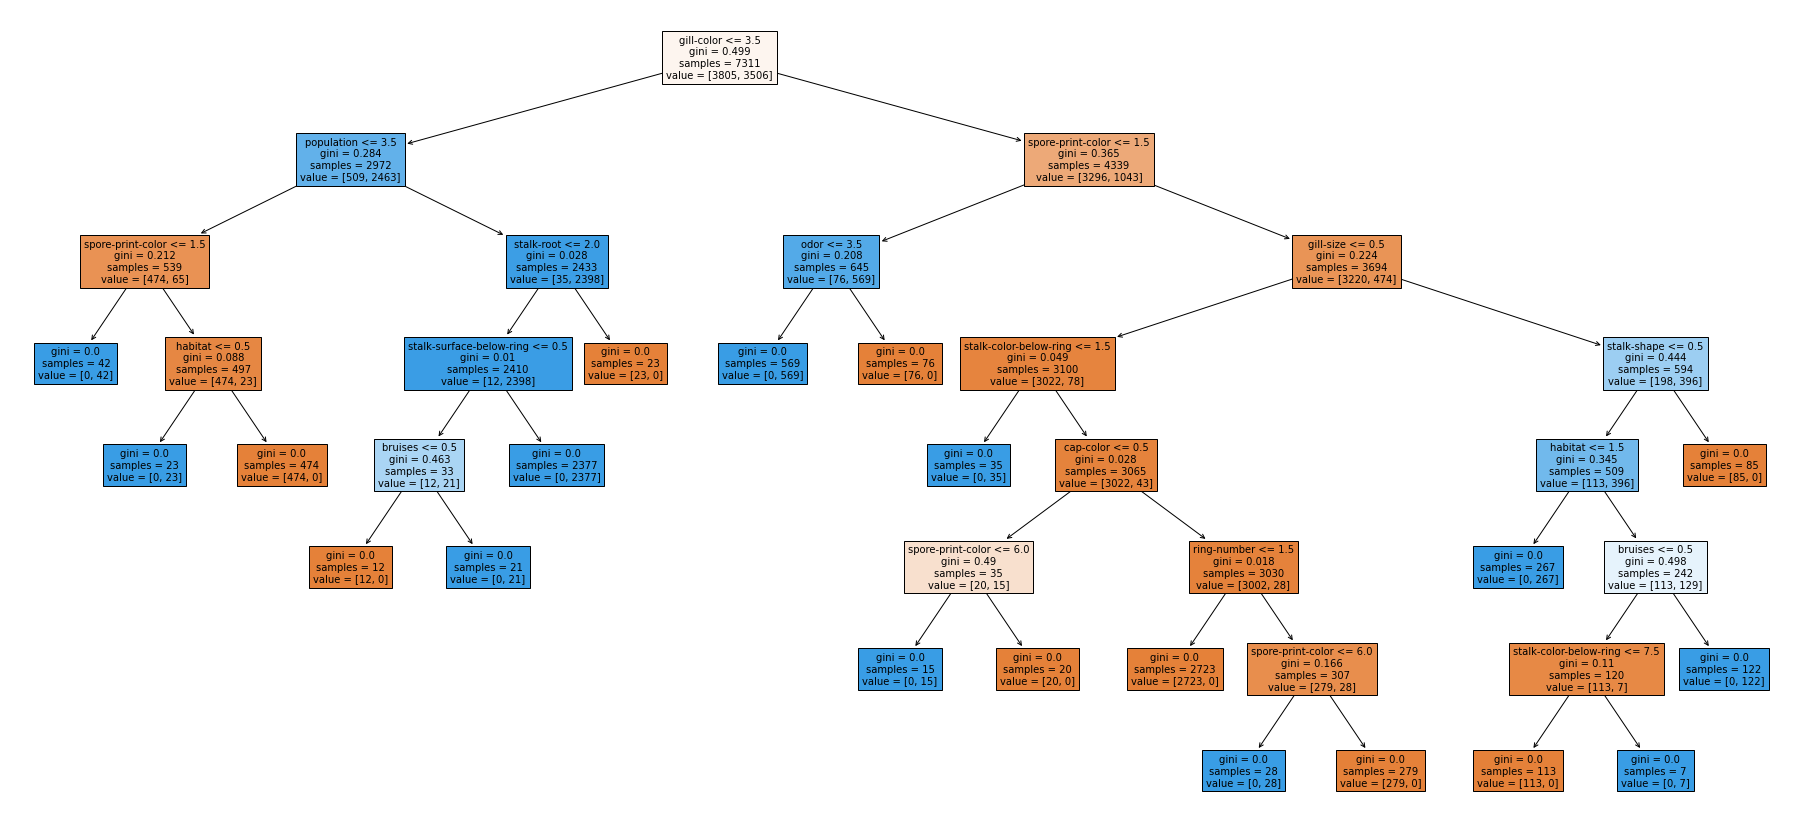

In [25]:
plt.figure(figsize= (32, 15))
plot_tree(dt, feature_names= X.columns, filled= True, fontsize=10)

- Our Model Performs 100% Correct Predictions
- If you like my work Please Upvote it 
- https://github.com/Dhruv-Raj